In [2]:
import pandas as pd
import numpy as np

import scipy as sp
import sklearn as sk
from scipy import stats
from scipy.stats import norm

import random
import time

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output


In [1]:

#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import imblearn as imb

#set visual parameters
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 16,8

In [3]:
#import data
PATH1 = "C:/Users/kpunyakoti/Desktop/Data Science/Projects/AmEx Hack/Source/"   #where you read the files from
PATH2 = "C:/Users/kpunyakoti/Desktop/Data Science/Projects/AmEx Hack/Submissions/"   #where you export the files to

train = pd.read_csv(f'{PATH1}train.csv')
test = pd.read_csv(f'{PATH1}test.csv')
#Save the 'Id' column
train_ID = train['session_id']
test_ID = test['session_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("session_id", axis = 1, inplace = True)
test.drop("session_id", axis = 1, inplace = True)

In [4]:
history = pd.read_csv(f'{PATH1}historical_user_logs.csv')

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.is_click.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['is_click'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data.head()
#all_data.to_csv(f'{PATH1}all_data.csv')

all_data size is : (592149, 13)


,DateTime,age_level,campaign_id,city_development_index,gender,product,product_category_1,product_category_2,user_depth,user_group_id,user_id,var_1,webpage_id
0,7/2/2017 0:00,4.0,359520,3.0,Female,C,4,NaN,3.0,10.0,858557,0,13787
1,7/2/2017 0:00,2.0,105960,NaN,Female,C,5,NaN,2.0,8.0,243253,0,11085
2,7/2/2017 0:00,2.0,359520,NaN,Female,C,4,NaN,2.0,8.0,243253,0,13787
3,7/2/2017 0:00,3.0,359520,2.0,Male,I,3,NaN,3.0,3.0,1097446,1,13787
4,7/2/2017 0:01,2.0,405490,2.0,Male,C,3,NaN,3.0,2.0,663656,1,60305


In [6]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
product_category_2,74.647597
city_development_index,26.975981
user_group_id,4.040706
user_depth,4.040706
gender,4.040706
age_level,4.040706


In [7]:
all_data['DateTime'] = pd.to_datetime(all_data['DateTime'])
all_data['Hour'] = all_data['DateTime'].dt.hour
all_data['Date'] = all_data['DateTime'].dt.day
all_data['Day'] = all_data['DateTime'].dt.weekday
all_data.drop(['DateTime'], axis=1, inplace=True)


In [8]:
all_data.drop(['product_category_2'], axis=1, inplace=True)
all_data.tail()

,age_level,campaign_id,city_development_index,gender,product,product_category_1,user_depth,user_group_id,user_id,var_1,webpage_id,Hour,Date,Day
592144,2.0,414149,4.0,Male,B,2,3.0,2.0,252148,0,45962,21,9,6
592145,1.0,98970,NaN,Male,D,4,3.0,1.0,47955,0,6970,21,9,6
592146,2.0,359520,NaN,Male,C,4,3.0,2.0,314236,0,13787,21,9,6
592147,2.0,98970,NaN,Male,E,2,3.0,2.0,988544,0,6970,21,9,6
592148,2.0,414149,3.0,Male,H,5,3.0,2.0,409394,0,45962,21,9,6


In [78]:
#all_data = all_data.interpolate()
#all_data = pd.get_dummies(all_data)
#all_data.shape

(592149, 23)

In [79]:
#train = all_data[:ntrain]
#test = all_data[ntrain:]
#print(train.shape)
#print(test.shape)

(463291, 23)
(128858, 23)


In [87]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#model = XGBClassifier() # gradientboosting proved to be much better than randomforest 
#model = ElasticNetCV()
#model.fit(train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
#preds = model.predict(test)

#submit = pd.DataFrame({'session_id': test_ID, 'is_click': preds})
#submit.to_csv(f'{PATH2}submission_2.csv', index=False)

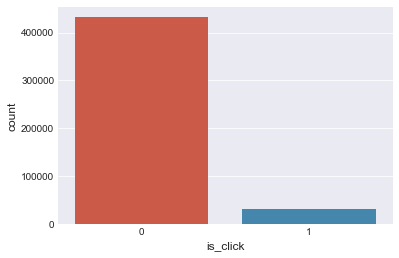

In [9]:
train.is_click.value_counts()

sns.countplot(train.is_click)

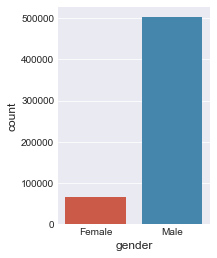

In [10]:
all_data.gender.value_counts()
plt.subplot(121)
sns.countplot(all_data.gender)

In [11]:
newdf = all_data.copy()
newtr = train.copy()

In [12]:
newtr['DateTime'] = pd.to_datetime(newtr['DateTime'])
newtr['Hour'] = newtr['DateTime'].dt.hour
newtr['Date'] = newtr['DateTime'].dt.day
newtr.tail()

,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,Hour,Date
463286,2017-07-07 23:59:00,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0,23,7
463287,2017-07-07 23:59:00,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0,23,7
463288,2017-07-07 23:59:00,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0,23,7
463289,2017-07-07 23:59:00,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0,23,7
463290,2017-07-07 23:59:00,1113780,C,405490,60305,3,NaN,5.0,Male,5.0,3.0,4.0,0,0,23,7


In [134]:
sizes_test = test.groupby('display_id')['ad_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)
sizes_test = sizes_test / np.sum(sizes_test)

plt.figure(figsize=(12,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(sizes_test.index, sizes_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

Sex
female    28.0
Name: Age, dtype: float64

In [16]:
prdct = pd.crosstab(newtr['product'],newtr['is_click'])
prdct

is_click,0,1
product,,
A,14438,953
B,21241,1238
C,152195,11306
D,38115,2949
E,19978,1474
F,6663,344
G,8979,435
H,101920,7654
I,59632,4079


In [14]:
prdct = pd.crosstab([newtr.Hour],[newtr.Date, newtr.is_click])
prdct

Date         2          3          4          5          6          7     
is_click     0    1     0    1     0    1     0    1     0    1     0    1
Hour                                                                      
0          381   23   396   39   295   23   289   20   305   25   374   20
1          327   24   279   21   172   17   218   15   218   15   262   27
2          246   22   320   19   229   11   174    7   238   11   284   13
3          945   49   680   46   560   44   560   31   709   48  1232   93
4         1824  109  1555   92  1158   69  1206   86  1501   85  2731  162
5         1936  148  2675  206  1606  110  2112  177  2070  132  3590  232
6         3138  247  4325  356  2264  218  3210  241  2522  177  3741  269
7         3514  290  5044  412  2355  220  3532  294  3773  273  4326  312
8         3589  292  5104  422  2669  230  3613  285  4075  276  4818  299
9         3845  308  4831  398  2513  218  3475  283  3993  242  4663  309
10        4591  362  4749  391  4121  333  4358  280  4971  332  5668  371
11        4485  367  3955  350  3625  280  4179  247  4191  300  5013  358
12        4583  352  3844  300  3834  333  3742  252  4102  287  3199  192
13        4502  350  3520  283  4019  334  3927  235  4509  282  2982  185
14        4530  351  4153  323  3998  310  4300  226  4461  300  2833  186
15        3838  294  3633  250  3603  258  3914  245  4558  288  2476  169
16        3160  262  3163  281  3102  252  4342  249  3985  250  2327  153
17        3469  285  3655  293  3734  292  4409  238  4037  276  2128  139
18        4106  335  3975  336  4735  331  5147  307  4788  318  2599  171
19        4905  386  5230  415  6102  491  6982  401  4018  259  3285  229
20        5826  433  5565  485  7159  493  7183  448  4063  273  3454  231
21        3321  313  2916  240  4122  306  3619  234  3441  235  2561  165
22        1393  123  1155   98  1313  118   917   71  1502   89  1678   68
23         800   66   560   42   470   36   478   31   685   38   841   48

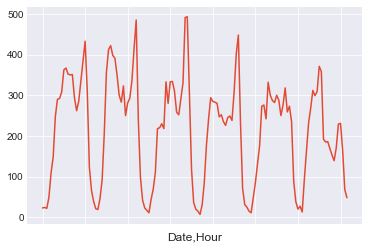

In [15]:
hrrate = newtr.loc[(newtr['is_click']==1),(['Date','Hour','is_click'])]
hr = hrrate.groupby(['Date','Hour'])['is_click'].sum()
hr
hr.plot()

In [18]:
#newtr.groupby(['user_group_id','age_level'])['is_click'].size().sort_values(ascending=False)

usr = pd.crosstab([newtr.user_group_id,newtr.age_level],[newtr.is_click])
usr

,is_click,0,1
user_group_id,age_level,,
0.0,0.0,140,13
1.0,1.0,38794,3152
2.0,2.0,127498,9780
3.0,3.0,131243,9074
4.0,4.0,47109,2971
5.0,5.0,20381,1608
6.0,6.0,1589,135
7.0,1.0,1329,92
8.0,2.0,5826,397


In [40]:
usr = pd.crosstab([newdf.age_level],[newdf.Date])
usr

Date,2,3,4,5,6,7,8,9
age_level,,,,,,,,
0.0,40,35,17,23,18,20,34,17
1.0,8092,8209,6900,6945,6997,6224,5702,6194
2.0,24528,25199,22810,24672,24561,21731,20373,18338
3.0,26082,28201,24822,28742,27259,25475,23107,20127
4.0,10392,10304,10410,11522,10697,10534,9924,8960
5.0,5799,5453,4853,5262,4885,4576,4609,4956
6.0,537,435,426,524,431,406,426,407


In [45]:
ur = pd.crosstab([newtr.user_id],[newtr.is_click])
ur
ur.to_csv(f'{PATH1}userbyclick.csv')

In [23]:
hr = pd.crosstab([newdf.Hour],[newdf.is_click])
hr

is_click,0,1
Hour,,
0,2040,150
1,1476,119
2,1491,83
3,4686,311
4,9975,603
5,13989,1005
6,19200,1508
7,22544,1801
8,23868,1804


In [24]:
date = pd.crosstab([newtr.Date],[newtr.is_click])
date

is_click,0,1
Date,,
2,73254,5791
3,75282,6098
4,67758,5327
5,75886,4903
6,72715,4811
7,67065,4401


In [165]:
df3 = newdf.loc[newdf['Couple'] == 1]
df3.loc[df3['Ticket'] == '17765']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,GrpSize,IsAlone,Couple
1295,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1,male,1,17765,2,0,1


In [ ]:
#newtr['city_development_index'] = newtr['city_development_index'].astype(str)
user = pd.crosstab(history['user_id'],history['action'])
user
#user.plot()

In [171]:
top_user = history.groupby('user_id')['action'].size().sort_values(ascending=False).head(50

user_id
71295      13166
369384      5169
845211      4605
857840      4314
138984      4191
176493      4157
455333      4103
996097      4031
574716      3998
194995      3837
868903      3799
1030684     3736
516495      3639
135491      3602
813467      3566
713351      3485
4589        3325
965131      3307
694403      3290
113876      3180
186557      3174
327288      3160
576960      3134
332798      3085
1061650     3075
696787      2989
708547      2888
390657      2886
445035      2871
143065      2828
51309       2817
130962      2786
177767      2781
847124      2761
66710       2740
622272      2682
295325      2680
358059      2663
792088      2635
199449      2630
816321      2628
650193      2609
423618      2564
290577      2562
391781      2554
1130679     2537
173347      2520
479944      2515
341559      2509
1040407     2504
Name: action, dtype: int64

In [172]:
history['DateTime'] = pd.to_datetime(history['DateTime'])
history['Hour'] = history['DateTime'].dt.hour
history['Date'] = history['DateTime'].dt.day
history.tail()

,DateTime,user_id,product,action,Hour,Date
24287529,2017-07-01 23:59:00,661885,D,view,23,1
24287530,2017-07-01 23:59:00,295226,I,view,23,1
24287531,2017-07-01 23:59:00,1100817,B,view,23,1
24287532,2017-07-01 23:59:00,820601,G,view,23,1
24287533,2017-07-01 23:59:00,524203,H,view,23,1


In [ ]:
#hishrrate = newtr.loc[(history['action']==1),(['Date','Hour','is_click'])]
hishr = pd.crosstab([history['Date'],history['Hour']],history['action'])
hishr
hishr.plot()

In [234]:
newdf['user_id'] = newdf['user_id'].astype(str)

newdf['user_id'].dtype

dtype('O')

In [ ]:
plt.plot(newdf.Hour, newdf.user_id, color = colors[newdf.user_id],
        '.', alpha = 1)

action,interest,view
product,,
A,31057,1842848
B,111127,4657729
C,30678,1716281
D,39690,2125079
E,12658,557354
F,32722,1689740
G,29121,1713621
H,117248,7854834
I,28770,1673333


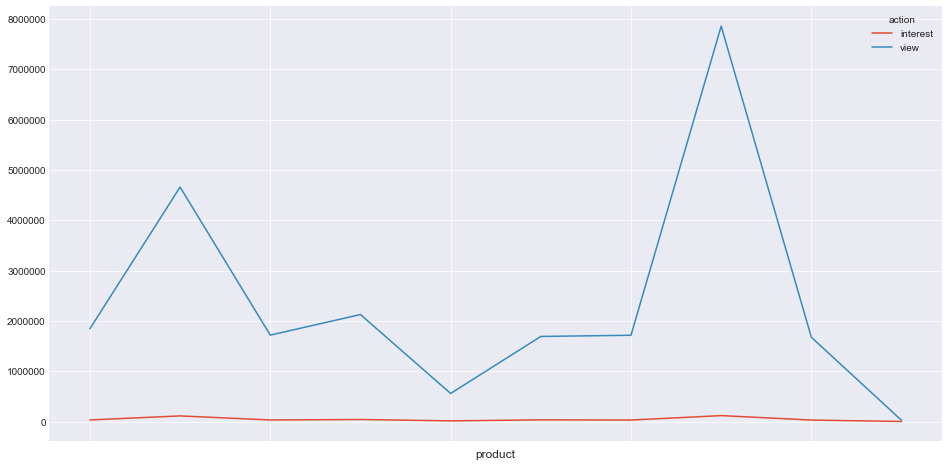

In [176]:
hispr = pd.crosstab(history['product'],history['action'])
hispr.plot()
hispr

action,interest
Hour,
0,2729
1,1884
2,2094
3,4433
4,9359
5,12632
6,16410
7,20340
8,22055


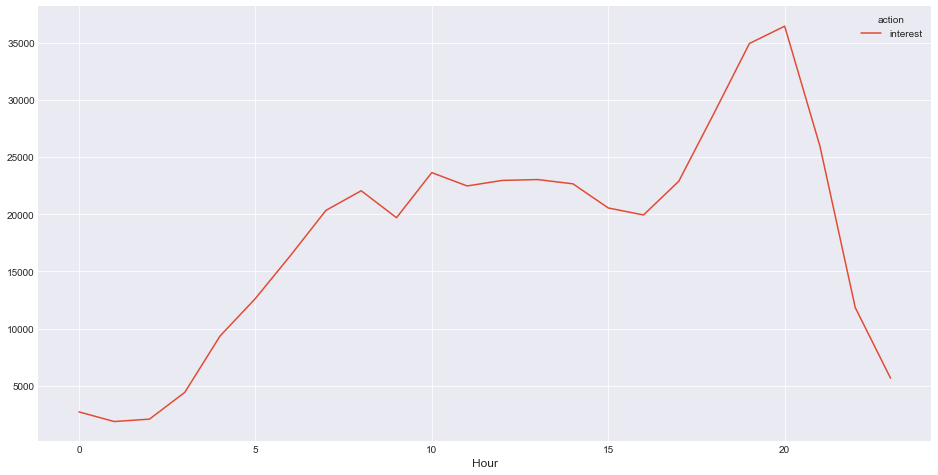

In [72]:
#dfi = history.loc[(history['action']=='interest')]
hisur = pd.crosstab(dfi['Hour'],dfi['action'])
hisur.plot()
hisur

In [181]:
dfi['DateTime'] = pd.to_datetime(dfi['DateTime'])
dfi['Hour'] = dfi['DateTime'].dt.hour
dfi['Date'] = dfi['DateTime'].dt.day

0    116647
1      8482
Name: is_click, dtype: int64

In [190]:
#newtr['user_depth'] = newtr['city_development_index'].astype(str)
city = pd.crosstab(newtr['age_level'],newtr['gender'])
city#.to_csv(f'{PATH2}age_sex.csv', index=False)

gender,Female,Male
age_level,,
0.0,33,120
1.0,1421,41946
2.0,6223,137278
3.0,20264,140317
4.0,13779,50080
5.0,8839,21989
6.0,1035,1724


In [186]:
agen = n

TypeError: 'DataFrame' object is not callable

In [193]:
import pandas as pd

df = pd.DataFrame({
          'A':['1','2','3'],
          'B':['2','1','3']
        })
df

,A,B
0,1,2
1,2,1
2,3,3


In [194]:
df = pd.get_dummies(df)
df

,A_1,A_2,A_3,B_1,B_2,B_3
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,0,0,1,0,0,1


In [195]:
train_clean = pd.read_csv(f'{PATH1}train_data_cleaned.csv')
train_clean.shape

(463291, 12)

In [196]:
df = pd.get_dummies(train_clean)

In [198]:
df.head()

,age_level,campaign_id,gender,product,product_category_1,user_depth,user_id,var_1,webpage_id,Hour,Date,Day
0,4,2,0,2,3,2,155569,0,1,0,0,6
1,2,0,0,2,4,1,48100,0,0,0,0,6
2,2,2,0,2,3,1,48100,0,1,0,0,6
3,3,2,1,8,2,2,16521,1,1,0,0,6
4,2,6,1,2,2,2,124129,1,7,0,0,6


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 12 columns):
age_level             463291 non-null int64
campaign_id           463291 non-null int64
gender                463291 non-null int64
product               463291 non-null int64
product_category_1    463291 non-null int64
user_depth            463291 non-null int64
user_id               463291 non-null int64
var_1                 463291 non-null int64
webpage_id            463291 non-null int64
Hour                  463291 non-null int64
Date                  463291 non-null int64
Day                   463291 non-null int64
dtypes: int64(12)
memory usage: 42.4 MB


In [221]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df = enc.fit_transform(df).to_array()
df = df.toarray()

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [215]:
df = train_clean[['gender']]
df = pd.get_dummies(df)
df.head()

,gender
0,0
1,0
2,0
3,1
4,1
